In [1]:
import numpy as np
import pandas as pd
#from Evaluator import ModelEvaluator
from EvaluatorDeepMAL import ModelEvaluator
import torch
import random
import swifter
from matplotlib import pylab as plt
from IPython.display import clear_output
import copy

In [2]:
asproxOld = pd.read_csv('./datasets/output-TrojanAsproxOld.csv', header=0)
asproxNew = pd.read_csv('./datasets/output-TrojanAsproxNew.csv', header=0)
electroRAT = pd.read_csv('./datasets/output-AllElectroRAT.csv', header=0)

In [3]:
data=pd.concat([asproxOld,asproxNew,electroRAT],ignore_index=True)
data['udps.n_bytes_per_packet'] = data['udps.n_bytes_per_packet'].swifter.apply(eval)
data = data.explode('udps.n_bytes_per_packet', ignore_index=True)

Pandas Apply:   0%|          | 0/123 [00:00<?, ?it/s]

In [4]:
benign_data = pd.read_csv('./datasets/benign_mean.csv', header=None)

In [5]:
benign_data

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,73.390992,74.119446,77.96041,75.565533,74.736896,77.11757,75.348485,81.508472,70.839602,72.926767,...,58.903542,59.783634,62.44176,58.618708,59.83721,60.874456,58.364369,62.393766,59.73149,60.793588


In [6]:
npdata=data.to_numpy()
malData=np.copy(npdata)
print(type(malData[1,:]))
print(malData[:1].shape)

<class 'numpy.ndarray'>
(1, 1)


In [7]:
npdata2=benign_data.to_numpy()
benignData=np.copy(npdata2)
print(type(benignData[0,:]))
print(benignData[:1].shape)

<class 'numpy.ndarray'>
(1, 1024)


In [8]:
data

,udps.n_bytes_per_packet
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[71, 69, 84, 32, 47, 110, 99, 115, 105, 46, 11..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
586,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
587,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
588,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
589,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:
type(data['udps.n_bytes_per_packet'][0])

list

In [10]:
testData = copy.copy(data)
testData = testData['udps.n_bytes_per_packet'].apply(lambda x: pd.Series(x))

# rename columns
testData = testData.rename(columns=lambda x: f'{x+1}')

In [11]:
#testData2 = copy.copy(benign_data)
#testData2 = testData2['udps.n_bytes_per_packet'].apply(lambda x: pd.Series(x))

# rename columns
#testData2 = testData2.rename(columns=lambda x: f'{x+1}')

In [12]:
testData

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71,69,84,32,47,110,99,115,105,46,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#testData2

In [14]:
testMalData = np.copy(testData.to_numpy())

In [15]:
testMalData.shape

(591, 1024)

In [16]:
malData

array([[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
malData.shape

(591, 1)

In [18]:
ogMalData = np.copy(malData)
malData = np.copy(testMalData)

In [19]:
ogBenignData = copy.copy(benign_data)
benignData = np.copy(benign_data.to_numpy())

In [20]:
benignData.shape

(1, 1024)

In [21]:
print(np.zeros(shape=(1,10)), np.zeros(shape=(1,10)).shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] (1, 10)


In [22]:
print(benignData, benignData.shape)

[[73.39099245 74.11944634 77.9604098  ... 62.39376587 59.73148993
  60.79358781]] (1, 1024)


In [63]:
modEval = ModelEvaluator()
modEval.test(benignData[0])

#state = np.asarray(malData[random.randint(0, len(malData)-1)])
#print(state)
#print(state.shape)
#value = state.tolist()
#print(value)
#modEval.test(value)

1/1 [==============================] - 32s 32s/step


array([[0.9974995]], dtype=float32)

## control

In [24]:
totalEpochs=1000
totalNumAdversarialData=500
saveValue=totalEpochs-totalNumAdversarialData
if saveValue<=0:
    saveValue=0
totalItemsConv=0
synthetic_data_size = 10
real_data_size = 1024 - synthetic_data_size

In [25]:
print(np.asarray(malData[random.randint(0, 100), :synthetic_data_size]))
print(np.asarray(malData[random.randint(0, 100), :synthetic_data_size]).shape)
test = np.reshape(np.asarray(malData[random.randint(0, 100), :synthetic_data_size]), (1, synthetic_data_size))
print(test)
print(test.shape)

[0 0 0 0 0 0 0 0 0 0]
(10,)
[[0 0 0 0 0 0 0 0 0 0]]
(1, 10)


In [26]:
print(np.asarray(benignData)[:, :real_data_size])
print(np.asarray(benignData)[:, :real_data_size].shape)

[[73.39099245 74.11944634 77.9604098  ... 59.63817018 62.27149807
  60.77977512]]
(1, 1014)


In [45]:
features=['A']
df=pd.DataFrame(columns=range(1024))
df_test=pd.DataFrame(columns=range(1024))

In [57]:
class MalwareEnv():
    def __init__(self,totalEpochs):
        # Actions we can take, decrease, increse
        self.action_space = 1024  
        # Set start 
        real_data =  np.asarray(benignData)[:, :real_data_size]
        synthetic_data = np.reshape(np.asarray(malData[random.randint(0, 100), :synthetic_data_size]), (1, synthetic_data_size))
        self.state = np.reshape(np.concatenate((real_data, synthetic_data), axis=1), (1024))
        print(self.state.shape)
        #model to evaluate the reward
        self.evaluator=ModelEvaluator()
        #units to move
        self.block=10
        #number of items saved
        self.savedItems=0
        self.savedTest=0
        #pointcritic
        self.pointCritic=totalEpochs-totalNumAdversarialData
        #loss
        self.hit=0
        
    def reset(self):
        real_data = np.asarray(benignData)[:, :real_data_size]
        synthetic_data = np.reshape(np.asarray(malData[random.randint(0, 100), :synthetic_data_size]), (1, synthetic_data_size))
        self.state = np.reshape(np.concatenate((real_data, synthetic_data), axis=1), (1024))

        
        
    def step(self, action):
        if action <= real_data_size:
            self.state[np.random.randint(1014,1024)] -= self.block
        elif action <= (real_data_size + synthetic_data_size):
            self.state[action] += self.block
            
        
    def reward(self):
        reward=-1
        value=self.state.tolist()
        result=self.evaluator.test(value)
        
        if(result<=0.7):
            self.hit+=5 #Ajustable
            reward=+20 #Ajustable
            self.saveItem()
        elif(result<=0.9):
            formatier=self.state.reshape(1,-1)[0]
            df_test.loc[self.savedTest]=formatier
            self.savedTest+=1
                 
        return reward    
    
    def saveItem(self):
        if self.hit >= self.pointCritic * 10:
            print("saved")
            formatier = self.state.reshape(1, -1)[0]
            df.loc[self.savedItems] = formatier
            self.savedItems += 1
            

    def render_np(self):
        return self.state

In [58]:
l1 = 1024
l2 = 2468
l3 = 5120
l4 = 2048
l5 = 1024
model = torch.nn.Sequential(
    torch.nn.Linear(l1, l2),
    torch.nn.ReLU(),
    torch.nn.Linear(l2, l3),
    torch.nn.ReLU(),
    torch.nn.Linear(l3,l4),
    torch.nn.ReLU(),
    torch.nn.Linear(l4,l5)
)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
loss_fn = torch.nn.MSELoss()
learning_rate = 1e-4 #Ajustable

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
gamma = 0.9
epsilon = 1.0

In [59]:
epochs = copy.copy(totalEpochs)
losses = []
env = MalwareEnv(totalEpochs)

for i in range(epochs):
    env.reset()
    state_ = env.render_np().reshape(1, real_data_size + synthetic_data_size) + np.random.rand(1, real_data_size + synthetic_data_size) / 250.0
    state1 = torch.from_numpy(state_).float()
    status = 1
    while status == 1:
        qval = model(state1.cuda())
        qval_ = qval.data.cpu().numpy()
        if random.random() < epsilon:
            action_ = np.random.randint(1014,1024)
            print("random:",action_)
        else:
            action_ = np.argmax(qval_)
            print("qval:",action_)
        env.step(action_)
        state2_ = env.render_np().reshape(1, real_data_size + synthetic_data_size) + np.random.rand(1, real_data_size + synthetic_data_size) / 250.0
        state2 = torch.from_numpy(state2_).float()
        reward = env.reward()
        with torch.no_grad():
            newQ = model(state2.reshape(1, real_data_size + synthetic_data_size).cuda())
        maxQ = torch.max(newQ)
        if reward == -1:
            Y = reward + (gamma * maxQ)
        else:
            Y = reward
        Y = torch.Tensor([Y]).detach()
        X = qval.squeeze()[action_]
        loss = loss_fn(X.cuda(), Y.cuda())
        print(i, loss.item())
        clear_output(wait=True)
        optimizer.zero_grad()
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        state1 = state2
        if reward != -1 or loss > 1e10 or loss <= 1.05:
            status = 0
    if epsilon > 0.1:
        epsilon -= (1 / epochs)

qval: 755
1/1 [==============================] - 0s 39ms/step
999 0.37110140919685364


In [ ]:
losses
#clear_output(wait=True)

[0.22418445348739624,
 0.25812822580337524,
 0.5936785340309143,
 99.34392547607422,
 1.979130320250988e-05,
 104.08069610595703,
 0.06143058463931084,
 92.75202178955078,
 0.22508667409420013,
 0.003825434949249029,
 0.5396041870117188,
 2.2780354022979736,
 85.0141372680664,
 0.22560492157936096,
 93.310546875,
 0.195114403963089,
 1.9751157760620117,
 3.9005448343232274e-05,
 92.42762756347656,
 0.36729785799980164,
 0.09236621111631393,
 0.09974696487188339,
 94.6777572631836,
 0.2256452888250351,
 96.27339935302734,
 3.104600667953491,
 1.7347588539123535,
 308.7862548828125,
 503.08282470703125,
 10.601241111755371,
 137.03858947753906,
 193.7822723388672,
 0.2165212482213974,
 0.42870768904685974,
 98.57914733886719,
 0.47082072496414185,
 0.14163236320018768,
 0.22090280055999756,
 0.0004863099893555045,
 0.5031339526176453,
 2.5121681690216064,
 2.159000873565674,
 0.3745080232620239,
 78.3226089477539,
 0.009421068243682384,
 0.22172904014587402,
 96.13640594482422,
 0.176497

Text(0, 0.5, 'Loss')

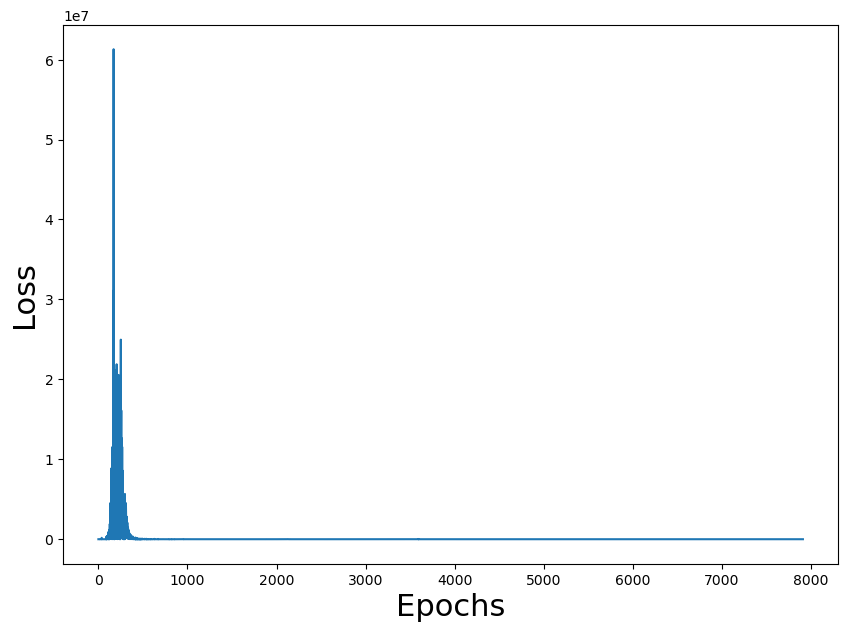

In [60]:
plt.figure(figsize=(10,7))
plt.plot(losses)
plt.xlabel("Epochs",fontsize=22)
plt.ylabel("Loss",fontsize=22)

In [61]:
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


In [62]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


In [ ]:
df.to_csv('datasets/Adversarial_data_10_v5.csv' ,header=False,index=False)

In [ ]:
df_test.to_csv('datasets/Adversarial_data_test_10_v5.csv' ,header=False,index=False)

In [ ]:
torch.save(model.state_dict(), 'DRL_MalwareMod_10_DeepMAL.sav')